Let's explore TensorFlow

In [1]:
import tensorflow as tf
import timeit
import numpy as np

In [2]:
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print sess.run(c)

[[ 22.  28.]
 [ 49.  64.]]


In [3]:
# Creates a graph.
with tf.device('/cpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    d = np.random.randint(5)
    c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
with tf.device('/gpu:0'):
    sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
    # Runs the op.
    print sess.run(c)

[[ 22.  28.]
 [ 49.  64.]]


Tensorflow assgines memory when creating graph

# Let's make a simple model

In [4]:
# generic
%matplotlib inline
from __future__ import print_function

# common
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

# for testing purpose
from IPython import display
import platform
#import plotly
#from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
#import tqdm
import time
def load_json(path):
    with open(path) as fp:
        return json.loads(fp.read())

def list_packages_versions():
    !date
    print("\ncompiler    : %s"%platform.python_compiler())
    l = platform.linux_distribution()
    print("system      : %s, %s, %s, %s"%(platform.system(),platform.release(),l[0],l[1]))
    print("processor   : %s, %s\n"%(platform.processor(),platform.architecture()[0]))
    
    a = %who_ls module
    for i in a:
        try:
            print("%s %s"%(("%s (%s) "%(globals()[i].__name__,i)).ljust(20,'_'),globals()[i].__version__))
        except:
            pass
list_packages_versions()

2016年  7月 23日 土曜日 13:43:46 JST

compiler    : GCC 4.4.7 20120313 (Red Hat 4.4.7-1)
system      : Linux, 4.4.0-31-generic, debian, stretch/sid
processor   : x86_64, 64bit

json (json) ________ 2.0.9
numpy (np) _________ 1.11.1
pandas (pd) ________ 0.18.1
platform (platform)  1.0.7
seaborn (sns) ______ 0.7.1
tensorflow (tf) ____ 0.9.0


In [5]:
!which python

/home/tomoaki/anaconda2/bin/python


In [6]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [8]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                         strides=[1, 2, 2, 1], padding="SAME")

In [9]:
sess  = tf.InteractiveSession()
tf.reset_default_graph()
sess.close()

with tf.device('/cpu:0'):
    x = tf.placeholder(tf.float32, shape=[None, 784])
    y_ = tf.placeholder(tf.float32, shape=[None, 10])
    x_image = tf.reshape(x, [-1, 28, 28, 1])
    
    W_conv1 = weight_variable([5, 5, 1, 32])
    b_conv1 = bias_variable([32])
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)

    W_conv2 = weight_variable([5, 5, 32, 64])
    b_conv2 = bias_variable([64])
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)

    W_fc1 = weight_variable([7 * 7 * 64, 1024])
    b_fc1 = bias_variable([1024])
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])
    y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)


    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[1]))
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
    correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    sess = tf.Session()
    sess.run(tf.initialize_all_variables())

st = time.time()
for i in range(1000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(session=sess, 
            feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
    train_step.run(session=sess, feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(session=sess, 
    feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))
sess.close()
elapsed = time.time() - st
print ("elapsed time:", elapsed)

step 0, training accuracy 0.1


KeyboardInterrupt: 

In [9]:
sess  = tf.InteractiveSession()
tf.reset_default_graph()
sess.close()

with tf.device('/gpu:0'):
    x = tf.placeholder(tf.float32, shape=[None, 784])
    y_ = tf.placeholder(tf.float32, shape=[None, 10])
    x_image = tf.reshape(x, [-1, 28, 28, 1])
    
    W_conv1 = weight_variable([5, 5, 1, 32])
    b_conv1 = bias_variable([32])
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)

    W_conv2 = weight_variable([5, 5, 32, 64])
    b_conv2 = bias_variable([64])
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)

    W_fc1 = weight_variable([7 * 7 * 64, 1024])
    b_fc1 = bias_variable([1024])
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])
    y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)


    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[1]))
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
    correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.Session()
sess.run(tf.initialize_all_variables())

st = time.time()
for i in range(1000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(session=sess, 
            feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
    train_step.run(session=sess, feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
"""
print("test accuracy %g"%accuracy.eval(session=sess, 
    feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))
"""
sess.close()
elapsed = time.time() - st
print ("elapsed time:", elapsed)

step 0, training accuracy 0.1
step 100, training accuracy 0.86
step 200, training accuracy 0.94
step 300, training accuracy 0.92
step 400, training accuracy 0.94
step 500, training accuracy 0.86
step 600, training accuracy 0.94
step 700, training accuracy 0.96
step 800, training accuracy 1
step 900, training accuracy 0.92
elapsed time: 11.1582379341


# Let's enjoy tensorboad!

In [10]:
def variable_summaries(var, name):
    """Attach a lot of summaries to a Tensor"""
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.scalar_summary('mean/' + name, mean)
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_sum(tf.square(var - mean)))
        tf.scalar_summary("stddev/" + name, stddev)
        tf.scalar_summary("max/" + name, tf.reduce_max(var))
        tf.scalar_summary("min/" + name, tf.reduce_min(var))

In [14]:
pwd

u'/home/tomoaki/alpaca/notebooks/Experiments'

In [15]:
sess  = tf.InteractiveSession()
tf.reset_default_graph()
sess.close()

with tf.device('/gpu:0'):
    x = tf.placeholder(tf.float32, shape=[None, 784])
    y_ = tf.placeholder(tf.float32, shape=[None, 10])
    x_image = tf.reshape(x, [-1, 28, 28, 1])
    
    W_conv1 = weight_variable([5, 5, 1, 32])
    b_conv1 = bias_variable([32])
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)

    W_conv2 = weight_variable([5, 5, 32, 64])
    b_conv2 = bias_variable([64])
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)

    W_fc1 = weight_variable([7 * 7 * 64, 1024])
    b_fc1 = bias_variable([1024])
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])
    y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)


    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[1]))
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
    correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.scalar_summary('accuracy', accuracy)
    
config = tf.ConfigProto(allow_soft_placement=True)
sess = tf.Session(config=config)
merged = tf.merge_all_summaries()
train_writer = tf.train.SummaryWriter("/home/tomoaki/alpaca/notebooks/Experiments/train", sess.graph)
test_writer = tf.train.SummaryWriter("/home/tomoaki/alpaca/notebooks/Experiments/test")

sess.run(tf.initialize_all_variables())

st = time.time()
for i in range(1000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy, summary = sess.run([accuracy, merged],
                                           feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
        test_writer.add_summary(summary, i)
    train_step.run(session=sess, feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(session=sess, 
    feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

sess.close()
elapsed = time.time() - st
print ("elapsed time:", elapsed)

step 0, training accuracy 0.06
step 100, training accuracy 0.84
step 200, training accuracy 0.9
step 300, training accuracy 0.9
step 400, training accuracy 0.92
step 500, training accuracy 0.94
step 600, training accuracy 0.92
step 700, training accuracy 0.92
step 800, training accuracy 0.98
step 900, training accuracy 0.96
test accuracy 0.9642
elapsed time: 11.5387699604


In [13]:
PWD

NameError: name 'PWD' is not defined

In [13]:
cross_enropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [14]:
train_step = tf.train.GradientDescentOptimizer(1.0e-4).minimize(cross_enropy)

In [18]:
import time

st = time.time()
sess = tf.Session()
# Runs the op.
init_op = tf.initialize_all_variables()
sess.run(init_op)
for i in range(1000):
    batch = mnist.train.next_batch(50)
    sess.run(train_step, feed_dict={x: batch[0], y_: batch[1]})
    if i%100 == 0:
        train_accuracy = accuracy.eval(session=sess,feed_dict={
            x:batch[0], y_: batch[1]})
        print("step %d, training accuracy %g"%(i, train_accuracy))
        
elapsed = time.time() - st
print ("elapsed time :", elapsed)
sess.close()

InternalError: Blas SGEMM launch failed : a.shape=(50, 784), b.shape=(784, 10), m=50, n=10, k=784
	 [[Node: MatMul_3 = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](_recv_Placeholder_0/_5, Variable/read)]]
Caused by op u'MatMul_3', defined at:
  File "/home/tomoaki/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/tomoaki/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/tomoaki/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/tomoaki/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/home/tomoaki/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "/home/tomoaki/anaconda2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/home/tomoaki/anaconda2/lib/python2.7/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/home/tomoaki/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/tomoaki/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/tomoaki/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/tomoaki/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/tomoaki/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/tomoaki/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/tomoaki/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/tomoaki/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/home/tomoaki/anaconda2/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/tomoaki/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/tomoaki/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/tomoaki/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-5bb91bf50f32>", line 1, in <module>
    y = tf.nn.softmax(tf.matmul(x, W) + b)
  File "/home/tomoaki/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/math_ops.py", line 1346, in matmul
    name=name)
  File "/home/tomoaki/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gen_math_ops.py", line 1271, in _mat_mul
    transpose_b=transpose_b, name=name)
  File "/home/tomoaki/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 703, in apply_op
    op_def=op_def)
  File "/home/tomoaki/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2298, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/tomoaki/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1232, in __init__
    self._traceback = _extract_stack()


In [24]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

In [26]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [27]:
print (accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9085


# Trial on MLP

In [135]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1,28,28,1])


h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)


W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
sess.run(tf.initialize_all_variables())
for i in range(20000):
    batch = mnist.train.next_batch(50)
    if i%1000 == 0:
        train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
        print "step %d, training accuracy %g"%(i, train_accuracy)
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print "test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})

step 0, training accuracy 0.1
step 1000, training accuracy 0.94
step 2000, training accuracy 1
step 3000, training accuracy 0.98
step 4000, training accuracy 1
step 5000, training accuracy 1
step 6000, training accuracy 1
step 7000, training accuracy 1
step 8000, training accuracy 1
step 9000, training accuracy 1
step 10000, training accuracy 0.98
step 11000, training accuracy 1
step 12000, training accuracy 1
step 13000, training accuracy 1
step 14000, training accuracy 0.98
step 15000, training accuracy 1
step 16000, training accuracy 1
step 17000, training accuracy 1
step 18000, training accuracy 1
step 19000, training accuracy 1
test accuracy 0.9922


In [17]:
b = tf.Variable(tf.zeros([3, 4]))
print (b.value())

Tensor("Variable_4/read:0", shape=(3, 4), dtype=float32)


In [18]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

In [22]:
print (b.initialized_value())

Tensor("Identity:0", shape=(3, 4), dtype=float32)


In [29]:
d = a.value()
print (d[0])

ValueError: Shape (3, 4) must have rank 1

In [4]:
import tensorflow as tf

In [14]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [10]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

sess = tf.InteractiveSession()

In [11]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [12]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [ ]:
x_image = tf.reshape(x, [-1,28,28,1])

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.initialize_all_variables())
for i in range(20000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.12
step 100, training accuracy 0.78
step 200, training accuracy 0.96
step 300, training accuracy 0.88
step 400, training accuracy 1
step 500, training accuracy 0.94


NameError: name 'x' is not defined

# Keep Working on tensorflow tutorial

In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [35]:
n_values = 32
x = tf.linspace(-3.0, 3.0, n_values)

In [36]:
sess = tf.Session()
result = sess.run(x)

In [37]:
x.eval(session=sess)

array([-3.        , -2.80645156, -2.61290312, -2.41935492, -2.22580647,
       -2.03225803, -1.83870971, -1.64516139, -1.45161295, -1.25806451,
       -1.06451619, -0.87096786, -0.67741942, -0.48387098, -0.29032278,
       -0.09677434,  0.0967741 ,  0.29032254,  0.48387098,  0.67741919,
        0.87096763,  1.06451607,  1.25806427,  1.45161295,  1.64516115,
        1.83870935,  2.03225803,  2.22580624,  2.41935444,  2.61290312,
        2.80645132,  3.        ], dtype=float32)

In [38]:
x.eval()

ValueError: Cannot evaluate tensor using `eval()`: No default session is registered. Use `with sess.as_default()` or pass an explicit session to `eval(session=sess)`

In [39]:
sess.close()
sess = tf.InteractiveSession()

In [40]:
x.eval()

array([-3.        , -2.80645156, -2.61290312, -2.41935492, -2.22580647,
       -2.03225803, -1.83870971, -1.64516139, -1.45161295, -1.25806451,
       -1.06451619, -0.87096786, -0.67741942, -0.48387098, -0.29032278,
       -0.09677434,  0.0967741 ,  0.29032254,  0.48387098,  0.67741919,
        0.87096763,  1.06451607,  1.25806427,  1.45161295,  1.64516115,
        1.83870935,  2.03225803,  2.22580624,  2.41935444,  2.61290312,
        2.80645132,  3.        ], dtype=float32)

In [42]:
sigma = 1.0
mean = 0.0
z = (tf.exp(tf.neg(tf.pow(x - mean, 2.0) / (2.0 * tf.pow(sigma, 2.0)))) * 
    (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

In [43]:
assert z.graph is tf.get_default_graph()

In [44]:
tf.get_default_graph()

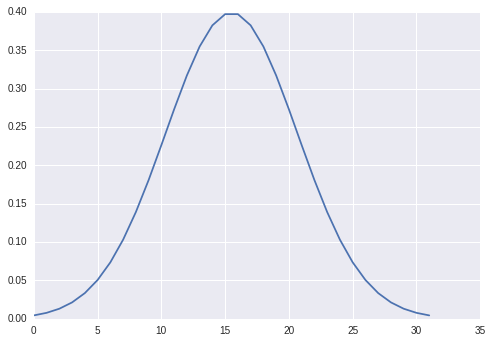

In [47]:
plt.plot(z.eval())

In [48]:
print (z.get_shape())

(32,)


In [50]:
print (z.get_shape().as_list())

[32]


In [51]:
print (tf.shape(z).eval())

[32]


In [52]:
print (tf.pack([tf.shape(z), tf.shape(z), [3], [4]]).eval())

[[32]
 [32]
 [ 3]
 [ 4]]


In [54]:
z_2d = tf.matmul(tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))

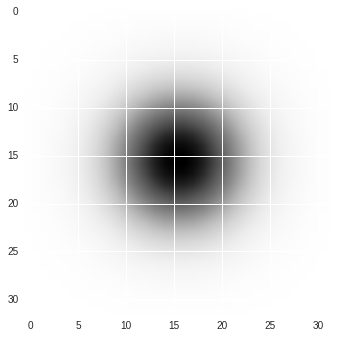

In [55]:
plt.imshow(z_2d.eval())

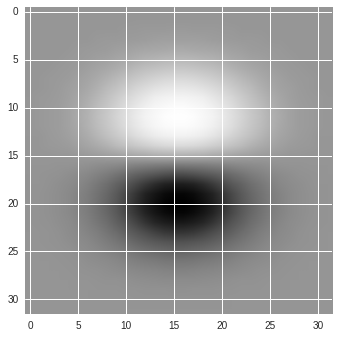

In [56]:
x = tf.reshape(tf.sin(tf.linspace(-3.0, 3.0, n_values)), [n_values, 1])
y = tf.reshape(tf.ones_like(x), [1, n_values])
z = tf.mul(tf.matmul(x, y), z_2d)
plt.imshow(z.eval())

In [58]:
ops = tf.get_default_graph().get_operations()
print ([op.name for op in ops])

[u'foo/v', u'foo/v/Initializer/random_uniform/shape', u'foo/v/Initializer/random_uniform/min', u'foo/v/Initializer/random_uniform/max', u'foo/v/Initializer/random_uniform/RandomUniform', u'foo/v/Initializer/random_uniform/sub', u'foo/v/Initializer/random_uniform/mul', u'foo/v/Initializer/random_uniform', u'foo/v/Assign', u'foo/v/read', u'foo1/v', u'foo1/v/Initializer/random_uniform/shape', u'foo1/v/Initializer/random_uniform/min', u'foo1/v/Initializer/random_uniform/max', u'foo1/v/Initializer/random_uniform/RandomUniform', u'foo1/v/Initializer/random_uniform/sub', u'foo1/v/Initializer/random_uniform/mul', u'foo1/v/Initializer/random_uniform', u'foo1/v/Assign', u'foo1/v/read', u'foo1/w', u'foo1/w/Initializer/random_uniform/shape', u'foo1/w/Initializer/random_uniform/min', u'foo1/w/Initializer/random_uniform/max', u'foo1/w/Initializer/random_uniform/RandomUniform', u'foo1/w/Initializer/random_uniform/sub', u'foo1/w/Initializer/random_uniform/mul', u'foo1/w/Initializer/random_uniform', u'

In [67]:
def gabor(n_values=32, simga=1.0, mean=0.0):
    x = tf.linspace(-3.0, 3.0, n_values)
    z = (tf.exp(tf.exp(tf.neg(tf.pow(x - mean, 2.0)))) * 
        (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
    gauss_kernel = tf.matmul(
        tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))
    x = tf.reshape(tf.sin(tf.linspace(-3.0, 3.0, n_values)), [n_values, 1])
    y = tf.reshape(tf.ones_like(x), [1, n_values])
    gabor_kernel = tf.mul(tf.matmul(x, y), gauss_kernel)
    return gabor_kernel

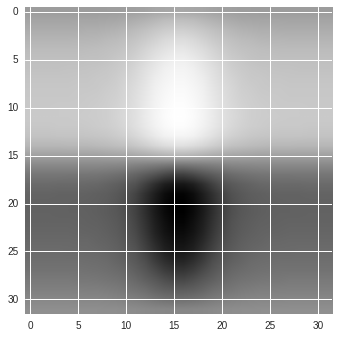

In [68]:
plt.imshow(gabor().eval())

In [69]:
def convolve(img, W):
    if len(W.get_shape()):
        dims = W.get_shape().as_list() + [1, 1]
        W = tf.reshape(W, dims)
        
        if len(img.get_shape()) == 2:
            dims = [1] + img.get_shape().as_list + [1]
            img = tf.reshape(img, dims)
        elif len(img.get_shape()) == 3:
            dims = [1] + img.get_shape().as_list
            img = tf.reshape(img, dims)
            W = tf.concat(2, [W, W, W])
            
        convolved = tf.nn.conv2s(img, W, 
                                strides=[1, 1, 1, 1], padding="SAME")
        return convolved

In [70]:
from skimage import data 
img = data.astronaut()
plt.imgshow(img)
print(img.shape)

ImportError: No module named skimage

In [71]:
sess.close()

# Liear Regression

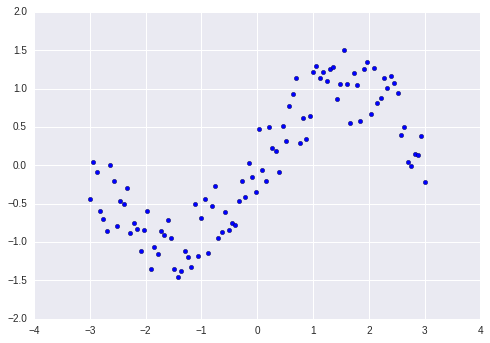

In [77]:
plt.ion()
n_observations = 100
fig, ax = plt.subplots(1, 1)
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
ax.scatter(xs, ys)
fig.show()
plt.draw()

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
Y_pred = tf.add(tf.mul(X, W), b)

In [82]:
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2)) / (n_observations - 1)

learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

n_epochs = 1000
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    
    prev_training_cost = 0.0
    for epoch_i in range(n_epochs):
        for (x, y) in zip(xs, ys):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
        training_cost = sess.run(
            cost, feed_dict={X:xs, Y: ys})
        print (training_cost)
        
        if epoch_i % 20 == 0:
            ax.plot(xs, Y_pred.eval(
                    feed_dict={X: xs}, session=sess),
                       'k', alpha=float(epoch_i / n_epochs))
            
            fig.show()
            plt.draw()
            
        if np.abs(prev_training_cost - training_cost) < 1.0e-6:
            break
        prev_training_cost = training_cost
fig.show()

1.87964
1.77533
1.68003
1.59279
1.51282
1.43937
1.3718
1.30953
1.25205
1.1989
1.14968
1.104
1.06156
1.02205
0.985214
0.950821
0.918658
0.888536
0.860287
0.833757
0.80881
0.785321
0.763178
0.742281
0.722537
0.703863
0.686183
0.66943
0.65354
0.638457
0.624127
0.610504
0.597544
0.585206
0.573453
0.562251
0.551569
0.541377
0.531648
0.522358
0.513482
0.505
0.496891
0.489136
0.481717
0.474618
0.467824
0.461319
0.45509
0.449125
0.44341
0.437934
0.432687
0.427658
0.422838
0.418217
0.413787
0.409538
0.405464
0.401557
0.39781
0.394215
0.390767
0.387459
0.384285
0.38124
0.378318
0.375515
0.372825
0.370243
0.367766
0.365388
0.363107
0.360917
0.358815
0.356798
0.354862
0.353004
0.351221
0.349509
0.347866
0.346289
0.344775
0.343322
0.341927
0.340588
0.339303
0.338069
0.336885
0.335749
0.334658
0.333611
0.332605
0.331641
0.330714
0.329825
0.328972
0.328153
0.327367
0.326612
0.325888
0.325193
0.324525
0.323885
0.32327
0.32268
0.322114
0.32157
0.321048
0.320548
0.320067
0.319606
0.319163
0.318738
0.318

# RNN for MNIST

In [99]:
input_vec_size = lstm_size = 28
time_step_size = 28

batch_size = 128
test_size = 256

def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.1))

def model(X, W, B, init_state, lstm_size):
    # X, input shape: (batch_size, input_vec_size, time_step_size)
    XT = tf.transpose(X, [1, 0, 2])  # permute time_step_size and batch_size
    # XT shape: (input_vec_size, batch_szie, time_step_size)
    XR = tf.reshape(XT, [-1, lstm_size]) # each row has input for each lstm cell (lstm_size)
    # XR shape: (input vec_size, batch_size)
    X_split = tf.split(0, time_step_size, XR) # split them to time_step_size (28 arrays)
    # Each array shape: (batch_size, input_vec_size)
    
    lstm = tf.nn.rnn_cell.BasicLSTMCell(lstm_size, forget_bias=1.0)

    outputs, _states = tf.nn.rnn(lstm, X_split, initial_state=init_state)
    # outputs: time_step * batch_size * lstm_size
    
    return tf.matmul(outputs[-1], W) + B, lstm.state_size


In [95]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels
trX = trX.reshape(-1, 28, 28)
teX = teX.reshape(-1, 28, 28)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [96]:
init_state = tf.placeholder("float", [None, 2 * lstm_size])

X = tf.placeholder("float", [None, 28, 28])
Y = tf.placeholder("float", [None, 10])

W = init_weights([lstm_size, 10])
B = init_weights([10])

py_x, state_size = model(X, W, B, init_state, lstm_size)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(py_x, Y))

train_op = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)
predict_op = tf.argmax(py_x, 1)  

In [101]:
with tf.Session() as sess:
    tf.initialize_all_variables().run()
    
    for i in xrange(100):
        for start, end in zip(xrange(0, len(trX), batch_size), range(batch_size, len(trX), batch_size)):
            sess.run(train_op, feed_dict={X: trX[start: end], Y: trY[start: end],
                                                                 init_state: np.zeros((batch_size, state_size))})
            
        test_indices = np.arange(len(teX))
        np.random.shuffle(test_indices)
        test_indices = test_indices
        test_indices = np.arange(len(teX))  # Get A Test Batch
        np.random.shuffle(test_indices)
        test_indices = test_indices[0:test_size]

        print(i, np.mean(np.argmax(teY[test_indices], axis=1) ==
                         sess.run(predict_op, feed_dict={X: teX[test_indices],
                                                         Y: teY[test_indices],
                                                         init_state: np.zeros((test_size, state_size))})))

0 0.71484375
1 0.8515625
2 0.91015625
3 0.9453125
4 0.94921875
5 0.9375
6 0.9765625
7 0.98046875
8 0.94140625
9 0.96484375
10 0.9765625
11 0.96484375
12 0.984375
13 0.97265625
14 0.9765625
15 0.98046875
16 0.9609375
17 0.9609375
18 0.96875
19 0.9765625
20 0.95703125
21 0.98046875
22 0.98046875
23 0.98828125
24 0.95703125
25 0.984375
26 0.984375
27 0.97265625
28 0.98828125
29 0.98046875
30 0.98828125
31 0.98046875
32 0.98046875
33 0.98046875
34 0.984375
35 0.96875
36 0.9609375
37 0.98828125
38 0.98828125
39 0.9765625
40 0.96875
41 0.97265625
42 0.97265625
43 0.97265625
44 0.9765625
45 0.984375
46 0.96484375
47 0.98046875
48 0.97265625
49 0.984375
50 0.9609375
51 0.97265625
52 0.97265625
53 0.96484375
54 0.97265625
55 0.98046875
56 0.98046875
57 0.984375
58 0.96875
59 0.98046875
60 0.96875
61 0.98046875
62 0.9921875
63 0.984375
64 0.9921875
65 0.98046875
66 0.984375
67 0.97265625
68 0.98046875
69 0.98828125
70 0.984375
71 0.9765625
72 0.96875
73 0.9765625
74 0.9765625
75 0.98046875
76 0.